---

title: "三大离散分布"
date: 2024-03-23
author: 郝鸿涛
slug: discrete-distributions
draft: false
toc: true
tags: 统计

---

![](img/discrete_distributions.png)

ChatGPT 画的，凑活着用。

In [46]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from scipy.stats import binom 

## Bernouli Distribution 

伯努利方程描述的是「一次」「只有」「两个」可能结果之实验的结果概率。最经典的莫过于抛一次硬币，不考虑硬币立起来的情况的话，我们只有两个可能结果：正面朝上或者背面朝上。假设硬币正面朝上 ($x=1$) 的概率是 $p (0 <= p <= 1)$，那我们随机抛一次这枚硬币这一事件结果的「概率质量函数」(Probability mass function, PMF) 为：

\begin{equation}
P(X = x) = \begin{cases}
p & \text{if } x = 1, \\
1 - p & \text{if } x = 0.
\end{cases}
\end{equation}

上述描述参考 [Brilliant.org](https://brilliant.org/wiki/bernoulli-distribution/) 上的解释。

画图的话：

Text(0, 0.5, 'Probability Mass Function')

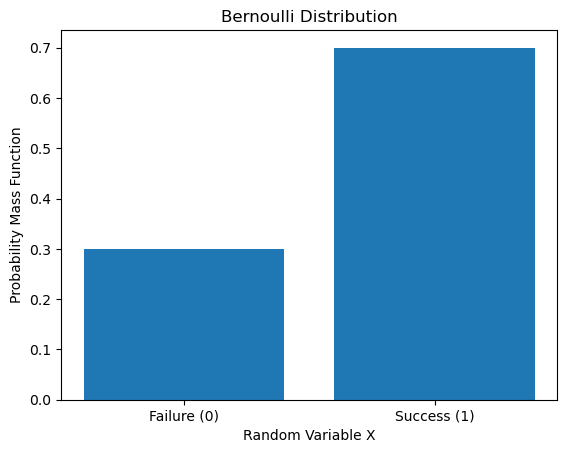

In [47]:
p = 0.7 # p when x = 1
bernoulli_values = [0, 1]
probs = [1-p, p]
plt.bar(bernoulli_values, probs, tick_label = ['Failure (0)', 'Success (1)'])
plt.title("Bernoulli Distribution")
plt.xlabel("Random Variable X")
plt.ylabel("Probability Mass Function")
# plt.savefig("img/bernoulli_distribution.png")

## Binomial Distribution 

如果要了解 Binomial Distribution, 我们需要一些排列组合知识。

### 排列 Permutations 

假设一共五张牌，随机抽两张，按顺序排，共有 $5 \times (5-1) = 20$ 种排列方式。

用数学表示的话：

$$_5 P_2 = \frac{5!}{(5 - 2)!} = \frac{5\times 4 \times 3 \times 2 \times 1}{3 \times 2 \times 1} = 5 \times 4 = 20$$

### 组合 Combinations

还是五张牌，随机抽两张，总共有 $\frac{5 \times 4}{2} = 10$ 中组合方式。注意，组合时两张牌有两种排列方式却只有一种组合方式。

用数学表示的话：

$$_5 C_2 = {5 \choose 2} = \frac{5!}{2!(5 - 2)!} = \frac{5 \times 4 \times 3 \times 2 \times 1}{2 \times 1 \times 3 \times 2 \times 1} = 5 \times 2 = 10$$

### 抛硬币

我们抛一枚无偏差的硬币 (fair coin)，抛 3 次，一共有 8 种可能结果：hhh, hht, htt, hth, ttt, tth, thh, tht。t 表示背面朝上，h 表示正面朝上。其中，2 次正面朝上一共有三种可能 hht, hth, thh，其概率是 $3/8$。

我们不可能每次都把所有情况列举出来。其中，抛 3 次硬币，2 次正面朝上，就相当于组合，3 选 2。

$${3 \choose 2} = \frac{3!}{2! (3 - 2)!} = \frac{3 \times 2}{2 \times 1} = 3$$

所以，抛一枚无偏差硬币 n 次，其中 k 次正面朝上一共有 ${n \choose k}$ 种可能。每一种可能的概率是一样的，都是 $0.5^3$。所以「抛一枚无偏差硬币 n 次，其中 k 次正面朝上」这一事件的概率为 ${n \choose k} \cdot 0.5^3$。

这是硬币无偏差的情况。那如果是一枚有偏差 (biased) 的硬币呢？

![](img/baised_coin_binomial.png)

所以，一枚有偏差的硬币，假如一次正面朝上的概率是 $p$，那么抛 $n$ 次，正面朝上 $k$ 次的概率是：

$$P_k = {n \choose k}p^k (1-p)^{n - k}$$

我们用 `Python` 来解释一下：

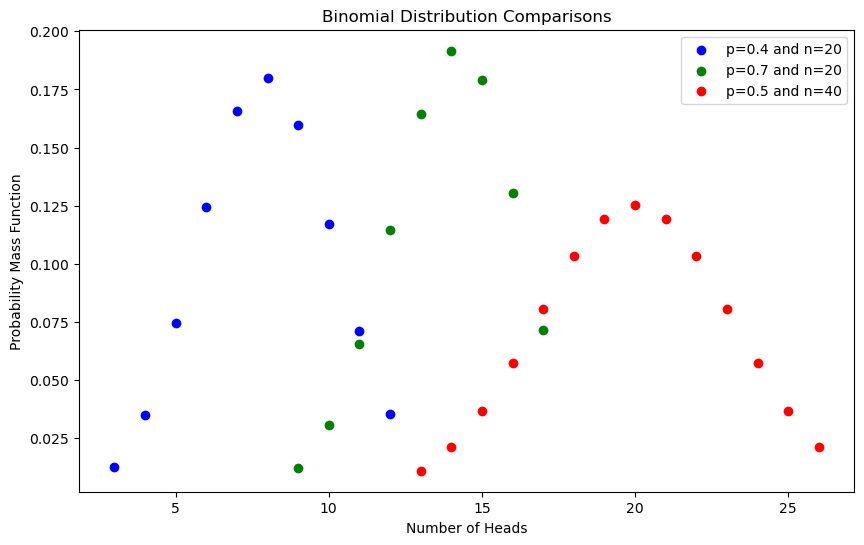

In [48]:
# Parameters for the binomial distributions
n1, p1 = 20, 0.4
n2, p2 = 20, 0.7
n3, p3 = 40, 0.5

# Generate the values for the x-axis
# 知道 n1, p1 之后，我们可以画出 pmf，如果是柱状图，那么所有柱子的面积和为1. 
# x = binom.ppf(p, n1, p1) 算的是当 x 到多少时，之前的柱子面积和就达到了 p
# 我们用此算出 p 为 0.01 和 0.99 时的 x 值，这样对于非常不可能的 x 值我们就不用花了
# 因为其值 (pmf) 太小了

x1 = np.arange(binom.ppf(0.01, n1, p1), binom.ppf(0.99, n1, p1))
x2 = np.arange(binom.ppf(0.01, n2, p2), binom.ppf(0.99, n2, p2))
x3 = np.arange(binom.ppf(0.01, n3, p3), binom.ppf(0.99, n3, p3))

# Calculate the probabilities for each x-value
pmf1 = binom.pmf(x1, n1, p1)
pmf2 = binom.pmf(x2, n2, p2)
pmf3 = binom.pmf(x3, n3, p3)

# Create the plot
plt.figure(figsize=(10,6))

# Plot each binomial distribution
plt.scatter(x1, pmf1, color='blue', label='p=0.4 and n=20')
plt.scatter(x2, pmf2, color='green', label='p=0.7 and n=20')
plt.scatter(x3, pmf3, color='red', label='p=0.5 and n=40')

# Labels and title
plt.xlabel('Number of Heads')
plt.ylabel('Probability Mass Function')
plt.title('Binomial Distribution Comparisons')
plt.legend()

# Show the plot
plt.show()

以上代码基本上是 ChatGPT 生成的，根据维基百科[这张图](https://en.wikipedia.org/wiki/Binomial_distribution#/media/File:Binomial_distribution_pmf.svg)。

## Poisson Distribution 泊松分布

>平均每一分钟来 5 辆公交车 ($\lambda = 5$)，请问下一分钟来 2 辆公交车的概率是多少？

我们可以用 Binomial Distribution。我们把 1 分钟分成 60 份。以下，0 代表没有公交车来，1 表示有公交车来。这就变成了 「60 choose k」这个问题。因为平均每分钟 5 辆，所以 $p = 5/60$

$$P_k = {60 \choose k} \left(\frac{\lambda}{60} \right)^k \left(1 - \frac{\lambda}{60} \right)^{(60 - k)}$$

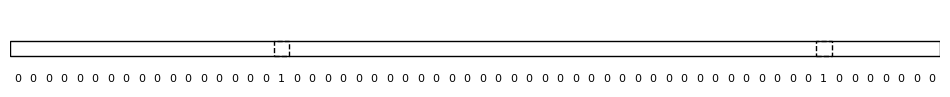

In [49]:
from matplotlib.patches import Rectangle

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 1))
ax.set_xlim(0, 60)
ax.set_ylim(0, 1)

# Hide the axes
ax.axis('off')

# Draw a long rectangle to represent the line
line = Rectangle((0, 0.4), 60, 0.2, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(line)

# Choose two random parts to write '1' and have a dashed shadow
random_parts = np.random.choice(range(60), size=2, replace=False)

# Draw rectangles for each part and label them
for i in range(60):
    # Determine the label for the part
    label = '1' if i in random_parts else '0'
    
    # Draw dashed shadow for parts with label '1'
    if label == '1':
        shadow = Rectangle((i, 0.4), 1, 0.2, linewidth=1, linestyle='--', edgecolor='black', facecolor='none')
        ax.add_patch(shadow)
    
    # Add the label below the line
    ax.text(i + 0.5, 0.1, label, ha='center', va='center', fontsize=8)

# Show the plot
plt.show()


有同学有可能会问，为什么一定是分成 60 份，我分成 10 亿份可以吗？你优秀，当然可以。

我们假设一分钟分成 $n$ 份，这个问题就变成一个这样的泊松分布：

$$
\begin{align*}
P_k &= {n \choose k} \left(\frac{\lambda}{n} \right)^k \left(1 - \frac{\lambda}{n} \right)^{(n - k)} \\
       &= \frac{n!}{(n-k)! k!} \cdot \frac{\lambda^k}{n^k}\cdot \frac{\left(1 - \frac{\lambda}{n} \right)^n}{\left(1 - \frac{\lambda}{n} \right)^k} \\
\end{align*} \tag{1}
$$

当 $n \to \infty$ 时

$$\frac{n!}{(n-k)!} \to n^k$$

上面这个你带入 $n = 10, k = 2$ 就大致可以理解了。

$$\left(1 - \frac{\lambda}{n} \right)^k \to 1$$

根据 $e$ 的定义：

$$\left(1 - \frac{\lambda}{n} \right)^n \to e^{-\lambda}$$

将上述极值带入公示一：

$$
\begin{align*}
P(X = k) &= \frac{n^k}{n^k}\cdot \frac{\lambda^k}{k!} \cdot \frac{e^{-\lambda}}{1}\\
       &= \frac{\lambda^k \cdot e^{-\lambda}}{k!} 
\end{align*} \tag{2}
$$



### 泊松分布的用处

泊松分布有什么用呢？可以用来估计 Binomial distribution 的值，特别是当 $n$ 特别大且 $p$ 非常小时。

>假设一枚硬币随机抛掷一次正面朝上的概率是 $10^{-6}$，请问抛掷 $10^5$ 次，正面朝上 $100$ 的概率是多少？

这个问题要使用 Binomial distribution 来解的话：

$$P_{100} = {10^5 \choose 10^2}(10^{-6})^{100} (1-10^{-6})^{10^5 - 10^2}$$

这个数几乎算不出来，但我们可以用泊松分布来拟合：

$$\lambda = 10^5 * 10^{-6} = 0.1$$

$$P(X = 100) = \frac{0.1^{100} \cdot e^{-0.1}}{100!}$$

这就好算多了。